## Prediction based on average gap in test_data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Show matplotlib plots inline
%matplotlib inline
bases_dir = "season_1_data"

# Load the data path
TRAIN_DATA_DIR = "season_1_data/training_data"
TEST_DATA_DIR = "season_1_data/test_data"

# All the data dirs
CLUSTER_MAP_SHEET_DIR = "cluster_map"
ORDER_SHEET_DIR = "order_data"
TRAFFIC_SHEET_DIR = "traffic_data"
WEATHER_SHEET_DIR = "weather_data"
POI_SHEET_DIR = "poi_data"

## Load Order Data 

In [106]:
import glob

train_order_path = os.path.join(TRAIN_DATA_DIR, ORDER_SHEET_DIR)
test_order_path = os.path.join(TEST_DATA_DIR, ORDER_SHEET_DIR)

train_order_files = glob.glob(os.path.join(train_order_path, "*.csv"))
test_order_files = glob.glob(os.path.join(test_order_path, "*.csv"))

# Load all the order data as train_order and test_order
train_order = pd.concat((pd.read_csv(f) for f in train_order_files))
test_order = pd.concat((pd.read_csv(f) for f in test_order_files))

In [107]:
train_order[['supply', 'gap']] = train_order[['supply', 'gap']].astype(int)
train_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163491 entries, 0 to 7904
Data columns (total 7 columns):
district_id    163491 non-null int64
date           163491 non-null object
week           163491 non-null int64
time           163491 non-null int64
demand         163491 non-null int64
supply         163491 non-null int32
gap            163491 non-null int32
dtypes: int32(2), int64(4), object(1)
memory usage: 8.7+ MB


In [108]:
for date, drp in test_order.groupby('date'):
    print len(drp.time) / 66.
    print date

25.1666666667
2016-01-22
22.4242424242
2016-01-24
25.0
2016-01-26
22.3333333333
2016-01-28
25.1363636364
2016-01-30


In [109]:
test_data_grouped = test_order.groupby(['district_id','week', 'time']).mean()
test_data_average_gap = test_data_grouped.reset_index()
test_data_average_gap[:2]

,district_id,week,time,demand,supply,gap
0,1,2,43,91,89.0,2.0
1,1,2,44,139,136.0,3.0


In [110]:
test_order['time_1'] = test_order.time.apply(lambda x: x+1)

In [111]:
test_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7924 entries, 0 to 1658
Data columns (total 8 columns):
district_id    7924 non-null int64
date           7924 non-null object
week           7924 non-null int64
time           7924 non-null int64
demand         7924 non-null int64
supply         7924 non-null float64
gap            7924 non-null float64
time_1         7924 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 557.2+ KB


In [127]:
test_order_last_num = test_order.loc[:,['district_id', 'time_1', 'demand', 'week','date','supply', 'gap']]
test_order_last_num.rename(columns={'time_1': 'time'}, inplace=True)
test_order_last_num[:2]

,district_id,time,demand,week,date,supply,gap
0,1,44,74,5,2016-01-22,70.0,4.0
1,1,45,128,5,2016-01-22,127.0,1.0


In [113]:
# Load test data, get time index
test_data = pd.read_csv('season_1/test.csv', header= None)
test_data.columns = ["district_id", "Time","gap"]

In [117]:
test_date =  test_data.Time.map(lambda x: x[:10])
test_time_slice = pd.to_datetime(test_date, unit='s')

test_data["week"] = test_time_slice.map(lambda x: x.isoweekday())
test_data["date"] = test_time_slice.map(lambda x: x.date())
test_data["time"] = test_data.Time.map(lambda x: x[11:]).map(int)

del test_data["gap"]
del test_data["Time"]
test_data[:2]

,district_id,week,date,time
0,1,5,2016-01-22,46
1,2,5,2016-01-22,46


In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 4 columns):
district_id    2838 non-null int64
week           2838 non-null int64
date           2838 non-null object
time           2838 non-null int64
dtypes: int64(3), object(1)
memory usage: 88.8+ KB


### Predict result based on average data in test_data 

In [119]:
result = test_data.merge(test_data_average_gap, on = ['district_id','week', 'time'], how='left' )
result[0:2]

,district_id,week,date,time,demand,supply,gap
0,1,5,2016-01-22,46,NaN,NaN,NaN
1,2,5,2016-01-22,46,NaN,NaN,NaN


## Predict gap based on previous time

In [139]:
test_order_last_num[['date']] = test_order_last_num[['date']].astype(str)
test_order_last_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7924 entries, 0 to 1658
Data columns (total 7 columns):
district_id    7924 non-null int64
time           7924 non-null int64
demand         7924 non-null int64
week           7924 non-null int64
date           7924 non-null object
supply         7924 non-null float64
gap            7924 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 495.2+ KB


In [140]:
test_data[['date']] = test_data[['date']].astype(str)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 4 columns):
district_id    2838 non-null int64
week           2838 non-null int64
date           2838 non-null object
time           2838 non-null int64
dtypes: int64(3), object(1)
memory usage: 88.8+ KB


In [141]:
result_last_num = test_data.merge(test_order_last_num, on = ['district_id', 'week','date','time'], how='left' )
result_last_num[:5]

,district_id,week,date,time,demand,supply,gap
0,1,5,2016-01-22,46,175.0,170.0,5.0
1,2,5,2016-01-22,46,23.0,22.0,1.0
2,3,5,2016-01-22,46,4.0,4.0,0.0
3,4,5,2016-01-22,46,76.0,71.0,5.0
4,5,5,2016-01-22,46,5.0,5.0,0.0


In [142]:
result_last_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 0 to 2837
Data columns (total 7 columns):
district_id    2838 non-null int64
week           2838 non-null int64
date           2838 non-null object
time           2838 non-null int64
demand         2664 non-null float64
supply         2664 non-null float64
gap            2664 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 177.4+ KB


In [147]:
resultnull = result_last_num[result_last_num.gap.isnull()]
resultnull[:15]

,district_id,week,date,time,demand,supply,gap
127,62,5,2016-01-22,58,NaN,NaN,NaN
128,63,5,2016-01-22,58,NaN,NaN,NaN
146,15,5,2016-01-22,70,NaN,NaN,NaN
181,50,5,2016-01-22,70,NaN,NaN,NaN
183,52,5,2016-01-22,70,NaN,NaN,NaN
194,63,5,2016-01-22,70,NaN,NaN,NaN
212,15,5,2016-01-22,82,NaN,NaN,NaN
247,50,5,2016-01-22,82,NaN,NaN,NaN
259,62,5,2016-01-22,82,NaN,NaN,NaN
260,63,5,2016-01-22,82,NaN,NaN,NaN


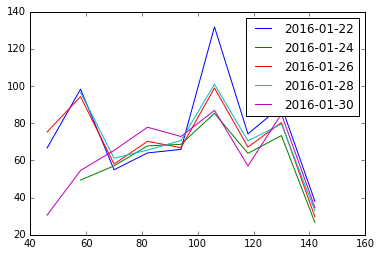

In [143]:
for date, drp in result_last_num.groupby('date'):
    plt.plot(drp.groupby('time').demand.mean(), label=str(date))
plt.legend()

In [123]:
result_last_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 0 to 2837
Data columns (total 8 columns):
district_id    2838 non-null int64
week           2838 non-null int64
date           2838 non-null object
time           2838 non-null int64
demand         2664 non-null float64
supply         2664 non-null float64
gap            2664 non-null float64
Time           2838 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 199.5+ KB


In [122]:
# Reformat to meet the submit format
result_last_num['Time'] = result_last_num['date'].map(str) + '-' + result_last_num['time'].map(str)
result_last_num_data = result_last_num.loc[:, ['district_id', 'Time', 'gap']]
result_last_num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 0 to 2837
Data columns (total 3 columns):
district_id    2838 non-null int64
Time           2838 non-null object
gap            2664 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 88.7+ KB
